In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys
print(sys.executable)

C:\Users\shz204\AppData\Local\Continuum\anaconda3\python.exe


In [3]:
import os
print(os.getcwd())

C:\Users\shz204\Downloads\MasteringComputerVision-V1.03\Master OpenCV


In [4]:
print(cv2.__version__)

4.0.0


### Read and Display

In [6]:
image = cv2.imread('tesla.jpg')

cv2.imshow("OriginalImage", image)
cv2.waitKey()
cv2.destroyAllWindows()

### Grayscale

In [7]:
gray_image = cv2.imread("tesla.jpg", 0)

cv2.imshow("Grayscale", gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
image = cv2.imread('tesla.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("OriginalImage", image)
cv2.imshow("Grayscale", gray)
cv2.waitKey()
cv2.destroyAllWindows()

### RGB

In [11]:
B, G, R = cv2.split(image)

In [12]:
print(B.shape)
print(G.shape)
print(R.shape)

(600, 400)
(600, 400)
(600, 400)


In [13]:
cv2.imshow("Blue", B)
cv2.imshow("Green", G)
cv2.imshow("Red", R)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
merged = cv2.merge([B, G, R])

cv2.imshow("Merged", merged)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")

cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))

cv2.waitKey()
cv2.destroyAllWindows()

### HSV 

In [17]:
image = cv2.imread("tesla.jpg")

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

cv2.imshow("HSV_Image", hsv_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
print(hsv_image.shape)

(600, 400, 3)


In [19]:
cv2.imshow('Hue Channel', hsv_image[:, :, 0])
cv2.imshow('Saturation Channel', hsv_image[:, :, 1])
cv2.imshow('Value Channel', hsv_image[:, :, 2])

cv2.waitKey()
cv2.destroyAllWindows()

### Histograms

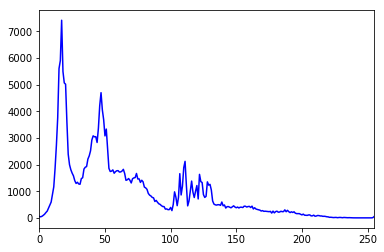

In [21]:
blue_dist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.plot(blue_dist, color = 'Blue')
plt.xlim([0, 255])

plt.show()

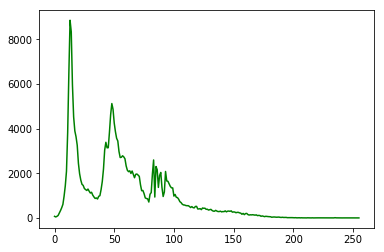

In [22]:
green_dist = cv2.calcHist([image], [1], None, [256], [0, 256])

plt.plot(green_dist, color = 'Green')
plt.show()

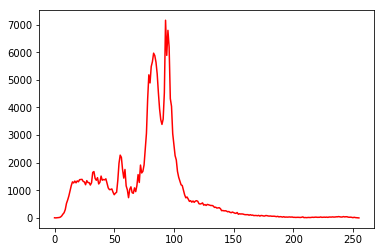

In [23]:
red_hist = cv2.calcHist([image], [2], None, [256], [0, 255])

plt.plot(red_hist, color = "Red")
plt.show()

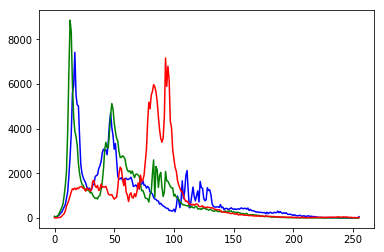

In [24]:
colors = ('b', 'g', 'r')

for i, c in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = c)
    
plt.show()

In [25]:
image.ravel().shape

(720000,)

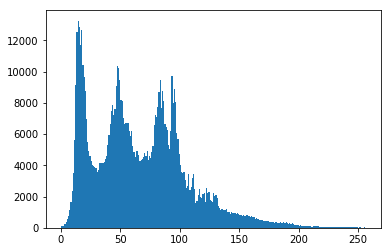

In [27]:
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

### Drawing Images

In [4]:
empty_image = np.zeros((512, 512, 3), np.uint8)
empty_image_bw = np.zeros((512, 512), np.uint8)

cv2.imshow("Black_Rectangle_color", empty_image)
cv2.imshow("Black_Rectangle_BW", empty_image_bw)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
empty_image = np.zeros((512, 512, 3), np.uint8)
cv2.line(empty_image, (0, 0), (511, 511), (256, 0, 0), 2)

cv2.imshow("Blue Line", empty_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
empty_image = np.zeros((512, 512, 3), np.uint8)
cv2.rectangle(empty_image, (100, 200), (400, 300), (255, 255, 255), -1)

cv2.imshow("Rectangle", empty_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
empty_image = np.zeros((512, 512, 3), np.uint8)
cv2.circle(empty_image, (256, 256), 100, (256, 256, 256), -1)

cv2.imshow("Circle", empty_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
empty_image = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[10, 50], [400, 50], [100, 400], [200, 200]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(empty_image, [pts], True, (255, 255, 255), 2)

cv2.imshow("Polygon", empty_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
empty_image = np.zeros((512, 512, 3), np.uint8)
cv2.putText(empty_image, "Hello, World!", (150, 256), cv2.FONT_HERSHEY_COMPLEX, 1, (256, 256, 256), 2)

cv2.imshow("Text", empty_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Translations

In [30]:
height, width = image.shape[:2]
T = np.float32([[1, 0, width/4], [0, 1, height/4]])
trans_image = cv2.warpAffine(image, T, (width, height))

cv2.imshow("Translated_Image", trans_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Rotations

In [26]:
height, width = image.shape[:2]
rot_mat = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
rot_image = cv2.warpAffine(image, rot_mat, (width, height))

cv2.imshow("Rotated_Image", rot_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [27]:
cv2.imshow("Origina_Image", image)
cv2.imshow("Transposed_Image", cv2.transpose(image))
cv2.imshow("Flipped_Image", cv2.flip(image, -1))
cv2.waitKey()
cv2.destroyAllWindows()

### Scaling

In [28]:
img_scaled = cv2.resize(image, None, fx = 0.75, fy = 0.75)
img_doubled = cv2.resize(image, None, fx = 2, fy = 2)
img_skewed = cv2.resize(image, (width//2, height//2), interpolation = cv2.INTER_AREA)

cv2.imshow("Original_Image", image)
cv2.imshow("Scaled_Down_Image", img_scaled)
cv2.imshow("Doubled_Imaged", img_doubled)
cv2.imshow("Skewed_Image", img_skewed)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
img_zoomed_default = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)
img_zoomed_cubic = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
img_zoomed_lanczos = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_LANCZOS4)

cv2.imshow("Linear_Interpolation", img_zoomed_default)
cv2.imshow("Cubic_Interpolation", img_zoomed_cubic)
cv2.imshow("Lanczos_Interpolation", img_zoomed_default)
cv2.waitKey()
cv2.destroyAllWindows()

### Pyramids

In [31]:
image_pyrup = cv2.pyrUp(image)
image_pyrdown = cv2.pyrDown(image)

cv2.imshow("PyrUp", image_pyrup)
cv2.imshow("PyrDown", image_pyrdown)
cv2.waitKey()
cv2.destroyAllWindows()

### Cropping

In [58]:
start_row, start_col = int(height * 0.25), int(width * 0.15)
end_row, end_col = int(height * 0.75), int(width * 0.75)

cropped_image = image[start_row:end_row, start_col:end_col]

cv2.imshow("Cropped_Image", cropped_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Arthimetic Operations

In [38]:
M = np.ones_like(image, dtype = "uint8") * 25

added = cv2.add(image, M)
subracted = cv2.subtract(image, M)

cv2.imshow("Added", added)
cv2.imshow("Subracted", subracted)
cv2.waitKey()
cv2.destroyAllWindows()

### Bitwise Operations

In [114]:
Z = np.zeros_like(gray_image, dtype="uint8")

bitand = cv2.bitwise_and(Z, gray_image)

cv2.imshow("Bitwise_And", bitand)
cv2.waitKey()
cv2.destroyAllWindows()

In [116]:
M = np.ones_like(gray_image, dtype="uint8")

bitor = cv2.bitwise_or(M, gray_image)

cv2.imshow("Bitwise_OR", bitor)
cv2.waitKey()
cv2.destroyAllWindows()

In [118]:
height, width = gray_image.shape

start_row, start_col = int(height * 0.25), int(width * 0.15)
end_row, end_col = int(height * 0.75), int(width * 0.75)

Z = np.zeros_like(gray_image, dtype="uint8")
cv2.rectangle(Z, (start_col, start_row), (end_col, end_row), (255), -1)

gray_image_bitand = cv2.bitwise_and(Z, gray_image)

cv2.imshow("Gray_Image_Bitand", gray_image_bitand)
cv2.waitKey()
cv2.destroyAllWindows()

In [135]:
cv2.imshow("Image", gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [120]:
height, width = image.shape[:2]

start_row, start_col = int(height * 0.25), int(width * 0.15)
end_row, end_col = int(height * 0.75), int(width * 0.75)

Z = np.zeros_like(image, dtype="uint8")
cv2.rectangle(Z, (start_col, start_row), (end_col, end_row), (255, 255, 255), -1)

color_image_bitand = cv2.bitwise_and(Z, image)

cv2.imshow("Color_Image_Bitand", color_image_bitand)
cv2.waitKey()
cv2.destroyAllWindows()

In [123]:
height, width = gray_image.shape

start_row, start_col = int(height * 0.25), int(width * 0.15)
end_row, end_col = int(height * 0.75), int(width * 0.75)

Z = np.zeros_like(gray_image, dtype="uint8")
cv2.rectangle(Z, (start_col, start_row), (end_col, end_row), (255), -1)

gray_image_bitor = cv2.bitwise_or(Z, gray_image)

cv2.imshow("Gray_Image_Bitor", gray_image_bitor)
cv2.waitKey()
cv2.destroyAllWindows()

In [131]:
height, width = gray_image.shape

start_row, start_col = int(height * 0.25), int(width * 0.15)
end_row, end_col = int(height * 0.75), int(width * 0.75)

Z = np.zeros_like(gray_image, dtype="uint8")
cv2.rectangle(Z, (start_col, start_row), (end_col, end_row), (255), -1)

gray_image_bitxor = cv2.bitwise_xor(Z, gray_image)

cv2.imshow("Original_Image", gray_image)
cv2.imshow("Gray_Image_Bitxor", gray_image_bitxor)
cv2.waitKey()
cv2.destroyAllWindows()

In [155]:
gray_image = cv2.imread("tesla.jpg", 0)

gray_image_bitnot = cv2.bitwise_not(gray_image)

cv2.imshow("Original_Image", gray_image)
cv2.imshow("Gray_Image_Bitnot", gray_image_bitnot)
cv2.waitKey()
cv2.destroyAllWindows()

gray_image = cv2.imread("tesla.jpg", 0)

### Blurring

In [10]:
kernel_3x3 = np.ones((3, 3), np.float32) / 9

blurred = cv2.filter2D(image, -1, kernel_3x3)

cv2.imshow("3x3 Kernel Blurring", blurred)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
kernel_7x7 = np.ones((7, 7), dtype=np.float32) / 9

blurred2 = cv2.filter2D(image, -1, kernel_7x7)

cv2.imshow("7x7 Kernel Blurring", blurred2)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
blurr = cv2.blur(image, (3, 3))
cv2.imshow("Averaging", blurr)
cv2.waitKey(0)

gaussian = cv2.GaussianBlur(image, (7, 7), 0)
cv2.imshow("Gaussian", gaussian)
cv2.waitKey(0)

medianblur = cv2.medianBlur(image, 5)
cv2.imshow("Median", medianblur)
cv2.waitKey(0)

bilateral = cv2.bilateralFilter(image, 5, 75, 75)
cv2.imshow("Bilateral", bilateral)
cv2.waitKey(0)

cv2.destroyAllWindows()

### De-Noising

In [32]:
cv2.imshow("Original_Image", image)
cv2.waitKey(0)

dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
cv2.imshow('Fast Means Denoising', dst)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Sharpening

In [9]:
kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2.imshow("Image_Sharpening", sharpened)
cv2.waitKey()
cv2.destroyAllWindows()

### Thresholding

In [16]:
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret, thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret, thresh2 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold Binary Inverse", thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret, thresh3 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow("Threshold Truncate", thresh3)

# Values below 127 go to 0, above 127 are unchanged 
ret, thresh4 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow("Threshold ToZero", thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret, thresh5 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('Threshold ToZero Inv', thresh5)

cv2.waitKey()
cv2.destroyAllWindows()

In [31]:
cv2.imshow("Original Image", gray_image)
cv2.waitKey()

ret, thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("Binary Threshold", thresh1)
cv2.waitKey()

gaussian = cv2.GaussianBlur(gray_image, (3, 3), 0)

th1 = cv2.adaptiveThreshold(gaussian, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
cv2.imshow("Adaptive Mean", th1)
cv2.waitKey()

_, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", th2) 
cv2.waitKey(0) 

_, th3 = cv2.threshold(gaussian, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Gaussian Otsu's Thresholding", th3) 
cv2.waitKey(0) 

cv2.destroyAllWindows()

### Dilation, Erosion, Opening and Closing

In [41]:
kernel_5x5 = np.ones((5, 5), dtype = np.uint8)

erosion = cv2.erode(image, kernel_5x5, iterations = 1)
cv2.imshow("Eroded", erosion)
cv2.waitKey()

dilation = cv2.dilate(image, kernel_5x5, iterations = 1)
cv2.imshow("Dilated", dilation)
cv2.waitKey()

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_5x5)
cv2.imshow("Opening", opening)
cv2.waitKey()

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_5x5)
cv2.imshow("Closing", closing)
cv2.waitKey()

cv2.destroyAllWindows()

### Edge Detection and Image Gradients

In [2]:
import cv2
import numpy as np

gray_image = cv2.imread('tesla.jpg',0)

height, width = gray_image.shape

sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow('Original', gray_image)
cv2.waitKey(0)
cv2.imshow('Sobel X', sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(0)

cv2.destroyAllWindows()

error: OpenCV(4.0.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:261: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<1,-1,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [4]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.0.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:261: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<1,-1,-1>,struct cv::Set<3,4,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [8]:
canny = cv2.Canny(gray_image, 50, 120)
cv2.imshow("Canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()

### Perspective and Affine Transform

### Live Sketch Using Webcam

In [12]:
def sketch(image):  
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
    canny_edges = cv2.Canny(img_gray_blur, 10, 70)
    ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow('Our Live Sketcher', sketch(frame))
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()